# **Time Series Analysis of Air Pollution and Asthma Hospital Visits**
## **1.Introduction**


Understanding the temporal dynamics of air pollution and its impact on public health is crucial for developing effective mitigation strategies. In this section, I conduct a comprehensive time series analysis of key air pollutants—Nitrogen Dioxide (NO2) and Particulate Matter (PM2.5)—and their relationship with asthma-related hospital visits. By examining the trends, seasonality, and correlations within these datasets, I aim to uncover patterns and potential causal links that can inform predictive modeling and public health interventions.

## **2.Import the necessary libraries and the data**

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. These are some data wrangling and exploratory analysis from the previous parts. For detailed EDA, see the following:

https://github.com/Mary080102/Capston-Two/blob/702e2d32a0447fadb3b12368cb84e63dc31e0d75/Air%20quality-%20Exploratory%20Data%20Analysis.ipynb.ipynb

https://github.com/Mary080102/Capston-Two/blob/702e2d32a0447fadb3b12368cb84e63dc31e0d75/Pre-processing%20and%20Training%20Data%20Development.ipynb

### **2.1. Import libraries**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA

### **2.2.Load the Data**

In [23]:
df= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_transformed')

In [24]:
df.head()

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,80.0,21.7,7.5,False,True,False,False
1,2020,81.0,21.3,8.5,False,True,False,False
2,2020,661.0,19.4,7.5,False,True,False,False
3,2020,364.0,22.5,8.0,False,True,False,False
4,2020,116.0,26.3,9.2,False,True,False,False


## 3.Data Preparation

I have to ensure the data is in a time series format, with the time component (e.g., Year or a more granular time unit) properly formatted and handle any missing values, outliers, or inconsistencies in the data. In the previouse sections(EDA and data wrangling) missing values and outliesr,... waere resolved. I need to rename the column Year and set index. The Year column only contains yearly data so I don't change it to a full datetime.

In [29]:
df.rename(columns={'Year':'Date','no2/Mean ppb':'NO2','pm/Mean mcg/m3':'PM2.5' },inplace=True)

In [30]:
df.head()

,Date,Number,NO2,PM2.5,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,80.0,21.7,7.5,False,True,False,False
1,2020,81.0,21.3,8.5,False,True,False,False
2,2020,661.0,19.4,7.5,False,True,False,False
3,2020,364.0,22.5,8.0,False,True,False,False
4,2020,116.0,26.3,9.2,False,True,False,False


In [31]:
# Set the Date as the index

df.set_index('Date', inplace=True)

In [32]:
df.head()

,Number,NO2,PM2.5,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
Date,,,,,,,
2020,80.0,21.7,7.5,False,True,False,False
2020,81.0,21.3,8.5,False,True,False,False
2020,661.0,19.4,7.5,False,True,False,False
2020,364.0,22.5,8.0,False,True,False,False
2020,116.0,26.3,9.2,False,True,False,False


## 4. Visualize the Data

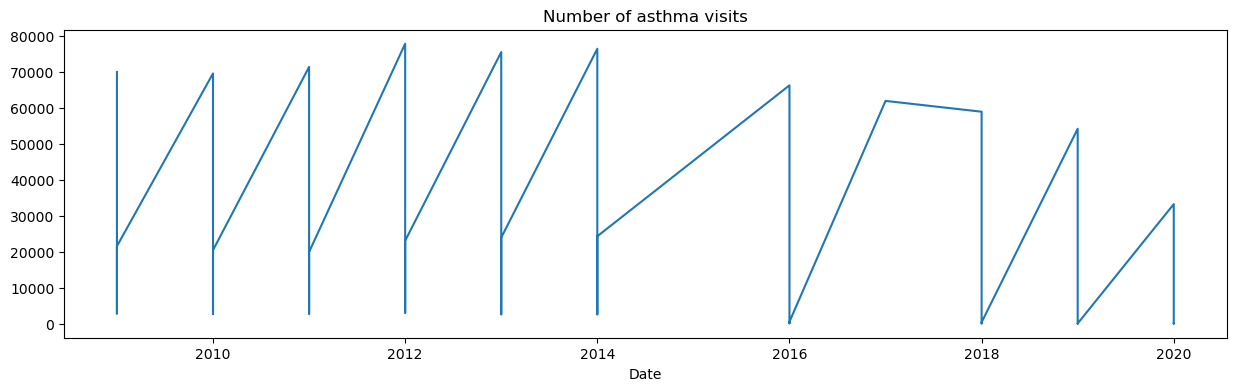

In [36]:
# Define a function to plot
def plot_df(df,x,y,title="",xlabel="Date",ylabel=""):
    plt.figure(figsize=(15,4))
    plt.plot(x,y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df.index, y=df['Number'],title='Number of asthma visits')

**Data Spikes:** There are clear spikes in the data which seem to occur periodically. This might indicate that there are specific years with significantly higher numbers of asthma visits.


**Gaps in Data:** The plot shows a sawtooth pattern, suggesting that there might be gaps or missing years in the data, or it might be that the data is not recorded every year.


**Overall Trend:** The plot does not show a clear increasing or decreasing trend in the number of asthma visits over time. Instead, it seems to fluctuate significantly between years.

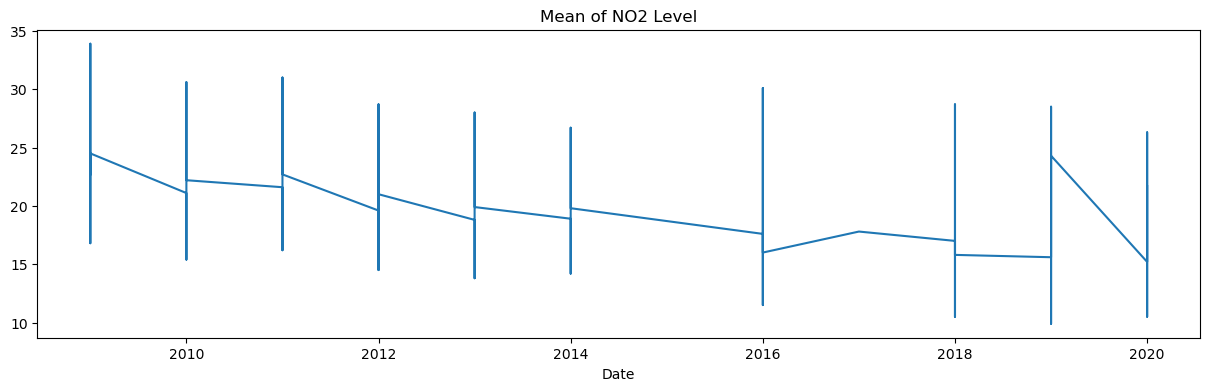

In [37]:
plot_df(df,x=df.index, y=df['NO2'],title='Mean of NO2 Level')

**Fluctuations in NO2 Levels:** The NO2 levels show noticeable fluctuations over the years. There are clear peaks and valleys indicating periods of higher and lower NO2 concentrations.

**Trend Analysis:** There is no clear upward or downward trend in the NO2 levels. The data appears to oscillate without a consistent increase or decrease over the period observed.

**Missing Data Impact:** The gap corresponding to the year 2015 is noticeable, causing a sudden drop and rise in the subsequent years, which could affect the overall analysis and trend detection.

**Potential Seasonal Effects:** The regular fluctuations could suggest potential seasonal or other periodic influences on NO2 levels.

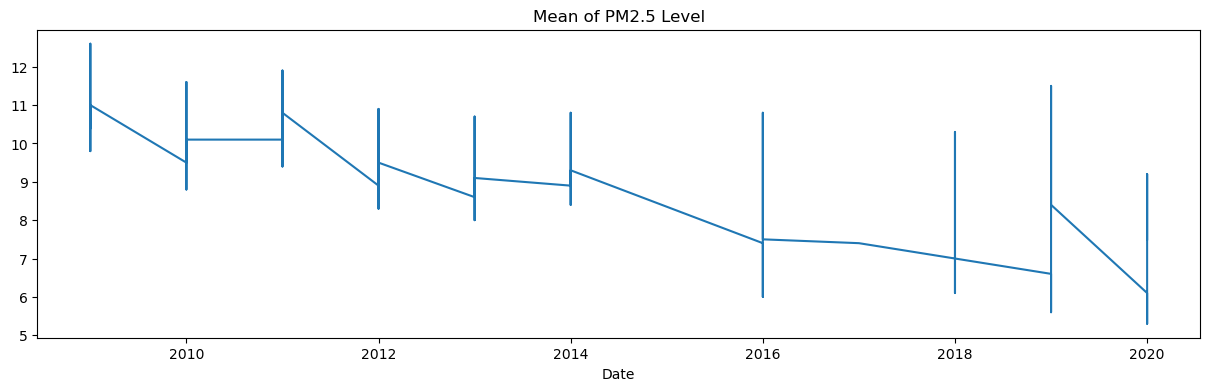

In [40]:
plot_df(df,x=df.index, y=df['PM2.5'],title='Mean of PM2.5 Level')

**Trend:** Unlike the NO2 plot, there appears to be a slight downward trend in the PM2.5 levels over the years. This suggests that the air quality might be improving in terms of particulate matter.

**Fluctuations:** Similar to NO2, PM2.5 levels also show fluctuations, but they are less pronounced. This could indicate more stable environmental conditions affecting PM2.5 levels.

**Missing Data Impact:** The gap corresponding to the year 2015 is also noticeable in the PM2.5 plot, causing an interruption in the otherwise smoother trend.

**Potential Seasonal Effects:** The regularity of the data points shows that there could be underlying seasonal or periodic influences.

## 5. decomposition of the Time Series

I can also visualize the data using time_series decomposition that allows us to decompose the time series into three distictive components: trend,seasonality, and noise.

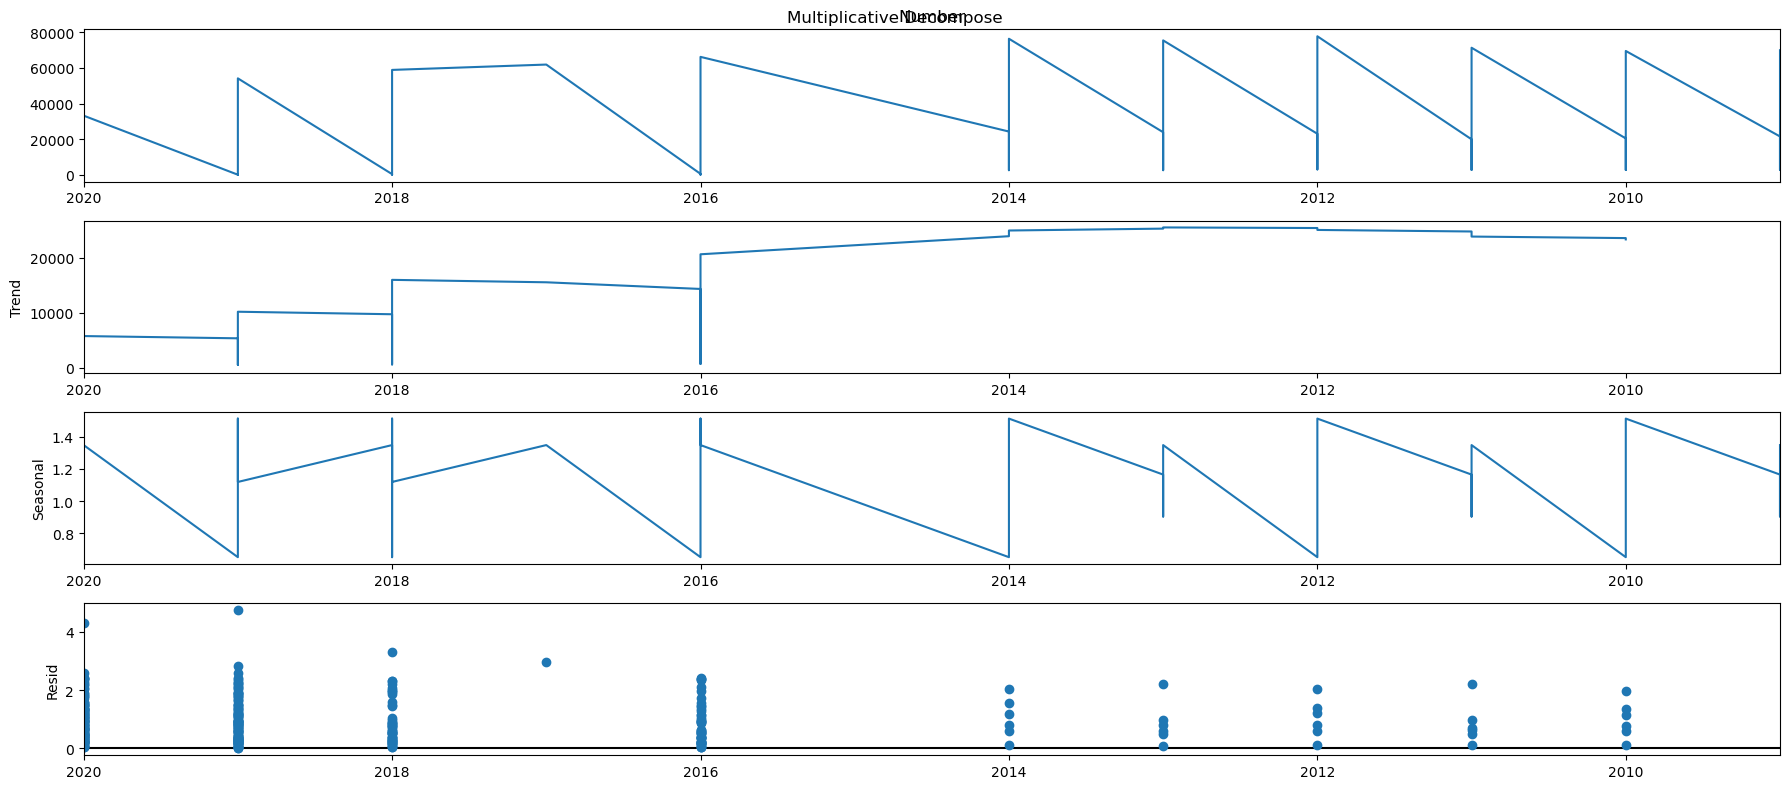

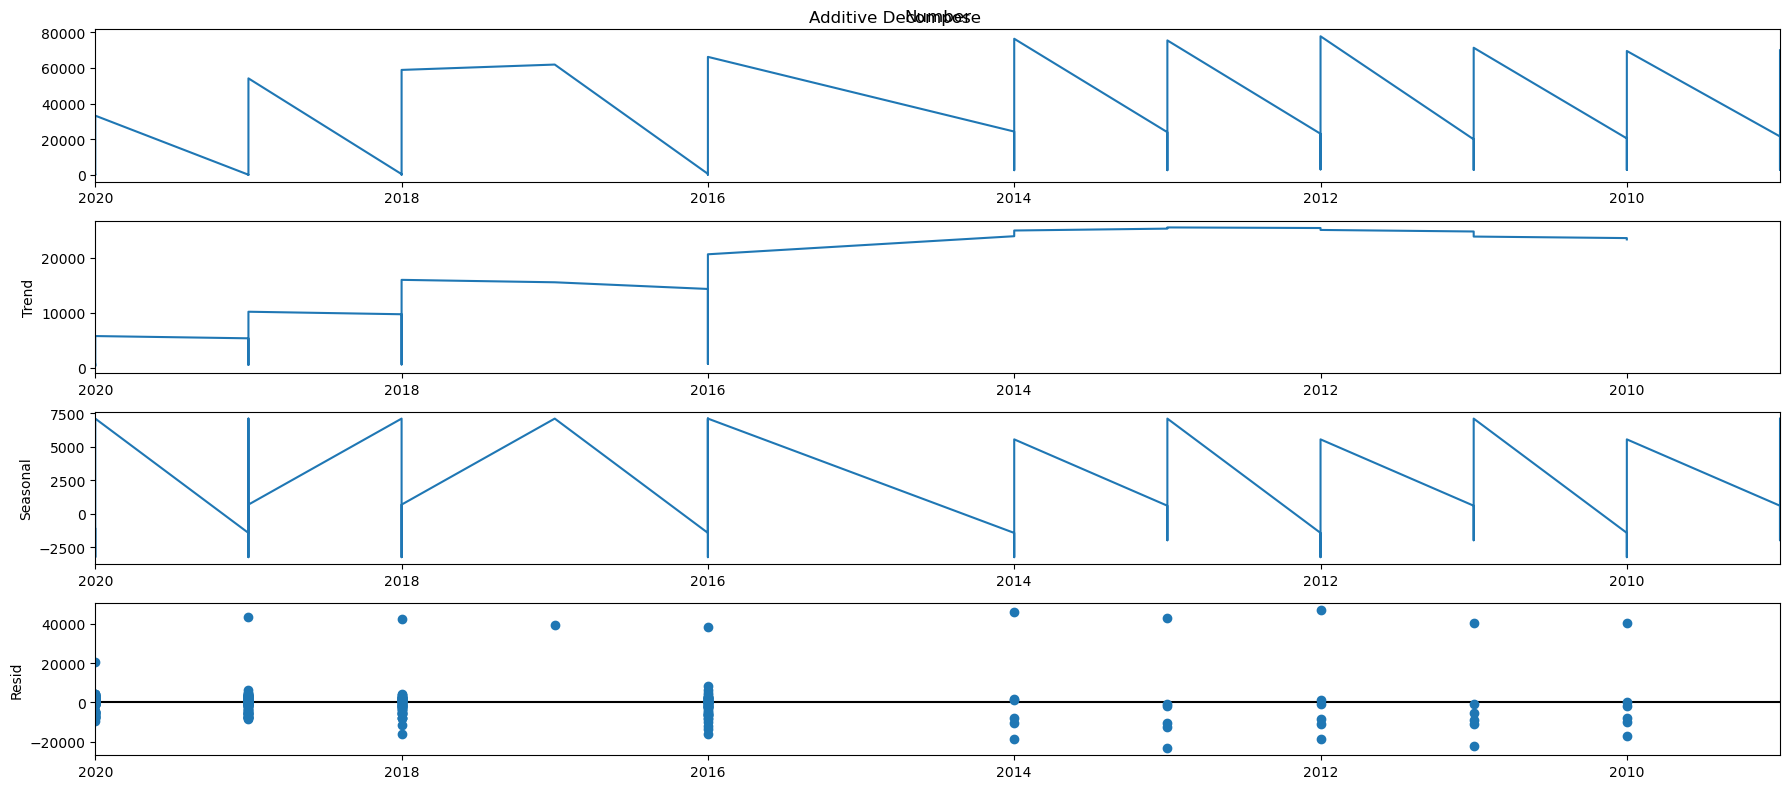

In [54]:
# Multiplicative Decomposition

multiplicative_decomposition= seasonal_decompose(df['Number'], model= 'multiplicative', period=12)

# Additive Decomposition

additive_decomposition= seasonal_decompose(df['Number'], model= 'additive', period=12)


# Plot

rcParams['figure.figsize']=18,8

multiplicative_decomposition.plot().suptitle('Multiplicative Decompose')

additive_decomposition.plot().suptitle('Additive Decompose')
plt.show()

**Seasonality:**
The trend component in both additive and multiplicative shows a clear pattern over the years with a decreasing and then stabilizing trend after certain years.

**Seasonal:**
The seasonality appears to be consistent over the years with regular repeating patterns, indicating a strong seasonal effect.

**Residual:**
The residuals show variations that are not captured by the trend or seasonal components. These spikes indicate anomalies or outliers that may need further investigation.